In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

train.drop(labels='index', axis=1, inplace=True)
test.drop(labels='index', axis=1, inplace=True)

In [3]:
display(train)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,3.0,...,1.0,20,2.0,12.0,4.0,2.0,1.0,4.0,2.0,1
1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,...,1.0,49,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1
2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,4.0,...,2.0,43,1.0,2.0,2.0,2.0,3.0,4.0,2.0,1
3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,4.0,...,1.0,17,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1
4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,4.0,...,2.0,18,2.0,12.0,1.0,2.0,1.0,1.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,...,1.0,17,1.0,1.0,3.0,2.0,1.0,3.0,2.0,0
14996,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,...,2.0,45,1.0,3.0,1.0,1.0,2.0,3.0,2.0,1
14997,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,...,1.0,20,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1
14998,5.0,5.0,4.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,...,1.0,29,1.0,12.0,4.0,2.0,2.0,2.0,1.0,0


In [4]:
display(test)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,gender,engnat,age,hand,religion,orientation,voted,married,familysize,ASD
0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,5.0,4.0,5.0,...,2.0,2.0,19,1.0,4.0,4.0,1.0,1.0,3.0,2.0
1,4.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,...,1.0,1.0,33,1.0,1.0,5.0,2.0,1.0,5.0,2.0
2,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,...,2.0,2.0,13,1.0,4.0,5.0,2.0,1.0,3.0,2.0
3,5.0,4.0,3.0,4.0,5.0,4.0,5.0,4.0,4.0,5.0,...,1.0,1.0,28,1.0,2.0,2.0,2.0,1.0,3.0,2.0
4,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,5.0,...,2.0,2.0,15,1.0,4.0,5.0,2.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35447,4.0,5.0,5.0,3.0,3.0,4.0,5.0,5.0,4.0,3.0,...,2.0,2.0,16,3.0,10.0,4.0,2.0,1.0,3.0,2.0
35448,5.0,5.0,5.0,5.0,5.0,4.0,5.0,3.0,5.0,3.0,...,3.0,1.0,16,3.0,2.0,5.0,2.0,1.0,2.0,2.0
35449,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,1.0,1.0,31,1.0,1.0,5.0,1.0,1.0,2.0,2.0
35450,5.0,5.0,4.0,5.0,5.0,1.0,5.0,1.0,5.0,5.0,...,1.0,1.0,19,1.0,12.0,1.0,2.0,1.0,NaN,2.0


In [5]:
train.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'country', 'introelapse',
       'testelapse', 'surveyelapse', 'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4',
       'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10', 'VCL1', 'VCL2',
       'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10',
       'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16', 'education',
       'urban', 'gender', 'engnat', 'age', 'hand', 'religion', 'orientation',
       'voted', 'married', 'familysize', 'ASD', 'nerdiness'],
      dtype='object')

In [6]:
pd.concat([train.nunique().rename('nunique in train'), test.nunique().rename('nunique in test')], axis=1)

,nunique in train,nunique in test
Q1,5,5.0
Q2,5,5.0
Q3,5,5.0
Q4,5,5.0
Q5,5,5.0
...,...,...
voted,2,2.0
married,3,3.0
familysize,20,24.0
ASD,2,2.0


In [7]:
missing_values = pd.concat([train.isnull().sum().rename('missing values in train'), 
                            test.isnull().sum().rename('missing values in test')], axis=1)
missing_values

,missing values in train,missing values in test
Q1,41,119.0
Q2,69,147.0
Q3,50,130.0
Q4,71,125.0
Q5,38,90.0
...,...,...
voted,85,181.0
married,82,180.0
familysize,319,703.0
ASD,89,237.0


In [8]:
"""
train.set_index('country',inplace=True)
train.set_index('introelapse',inplace=True)
train.set_index('surveyelapse',inplace=True)
train.set_index('age',inplace=True)

test.set_index('country',inplace=True)
test.set_index('introelapse',inplace=True)
test.set_index('surveyelapse',inplace=True)
test.set_index('age',inplace=True)

train = train.astype('int')
train.reset_index(inplace=True)

test = test.astype('int')
test.reset_index(inplace=True)
"""

"\ntrain.set_index('country',inplace=True)\ntrain.set_index('introelapse',inplace=True)\ntrain.set_index('surveyelapse',inplace=True)\ntrain.set_index('age',inplace=True)\n\ntest.set_index('country',inplace=True)\ntest.set_index('introelapse',inplace=True)\ntest.set_index('surveyelapse',inplace=True)\ntest.set_index('age',inplace=True)\n\ntrain = train.astype('int')\ntrain.reset_index(inplace=True)\n\ntest = test.astype('int')\ntest.reset_index(inplace=True)\n"

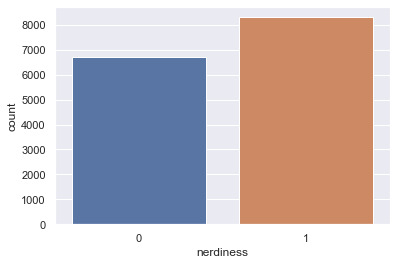

In [9]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="nerdiness", data=train)

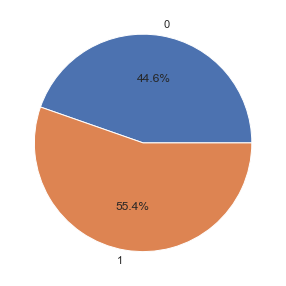

In [10]:
labels, frequencies = np.unique(train.nerdiness.values, return_counts=True)
plt.figure(figsize=(5,5))
plt.pie(frequencies, labels = labels, autopct= '%1.1f%%')
plt.show()

## Q1 ~ Q26

1,2,3의 값은 nerdiness 값이 0인 경향을 보이고,  
4,5의 값은 nerdiness 값이 1인 경향을 보입니다.  
따라서, 결측치는 0으로 라벨링, 1~3까지는 1로 라벨링, 4~5의 경우는 2로 라벨링했습니다.  
이후, Q1 ~ Q26까지의 값을 전부더해 Qs 컬럼 하나로 통일한 후 평균 점수를 내도록 하겠습니다.  

### About Q1 ~ Q10

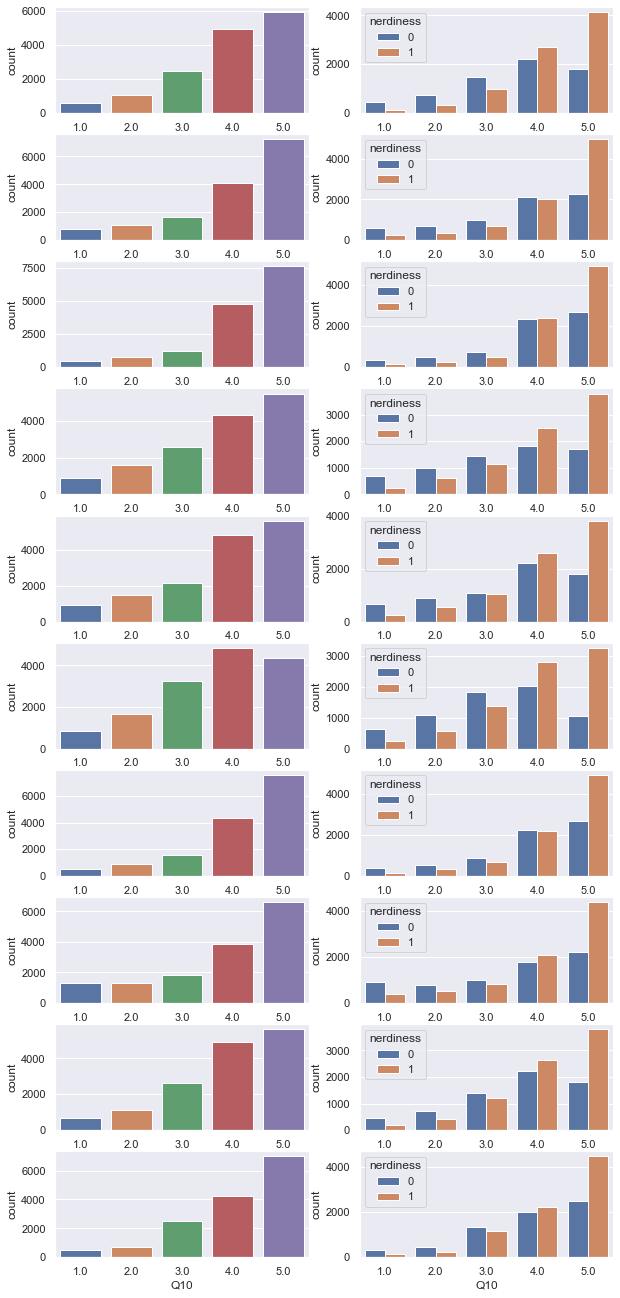

In [11]:
f, ax = plt.subplots(10, 2, figsize=(10, 23))
sns.countplot('Q1', data=train, ax=ax[0][0])
sns.countplot('Q1', hue='nerdiness', data=train, ax=ax[0][1])
sns.countplot('Q2', data=train, ax=ax[1][0])
sns.countplot('Q2', hue='nerdiness', data=train, ax=ax[1][1])
sns.countplot('Q3', data=train, ax=ax[2][0])
sns.countplot('Q3', hue='nerdiness', data=train, ax=ax[2][1])
sns.countplot('Q4', data=train, ax=ax[3][0])
sns.countplot('Q4', hue='nerdiness', data=train, ax=ax[3][1])
sns.countplot('Q5', data=train, ax=ax[4][0])
sns.countplot('Q5', hue='nerdiness', data=train, ax=ax[4][1])
sns.countplot('Q6', data=train, ax=ax[5][0])
sns.countplot('Q6', hue='nerdiness', data=train, ax=ax[5][1])
sns.countplot('Q7', data=train, ax=ax[6][0])
sns.countplot('Q7', hue='nerdiness', data=train, ax=ax[6][1])
sns.countplot('Q8', data=train, ax=ax[7][0])
sns.countplot('Q8', hue='nerdiness', data=train, ax=ax[7][1])
sns.countplot('Q9', data=train, ax=ax[8][0])
sns.countplot('Q9', hue='nerdiness', data=train, ax=ax[8][1])
sns.countplot('Q10', data=train, ax=ax[9][0])
sns.countplot('Q10', hue='nerdiness', data=train, ax=ax[9][1])
plt.show()

### About Q11 ~ Q20

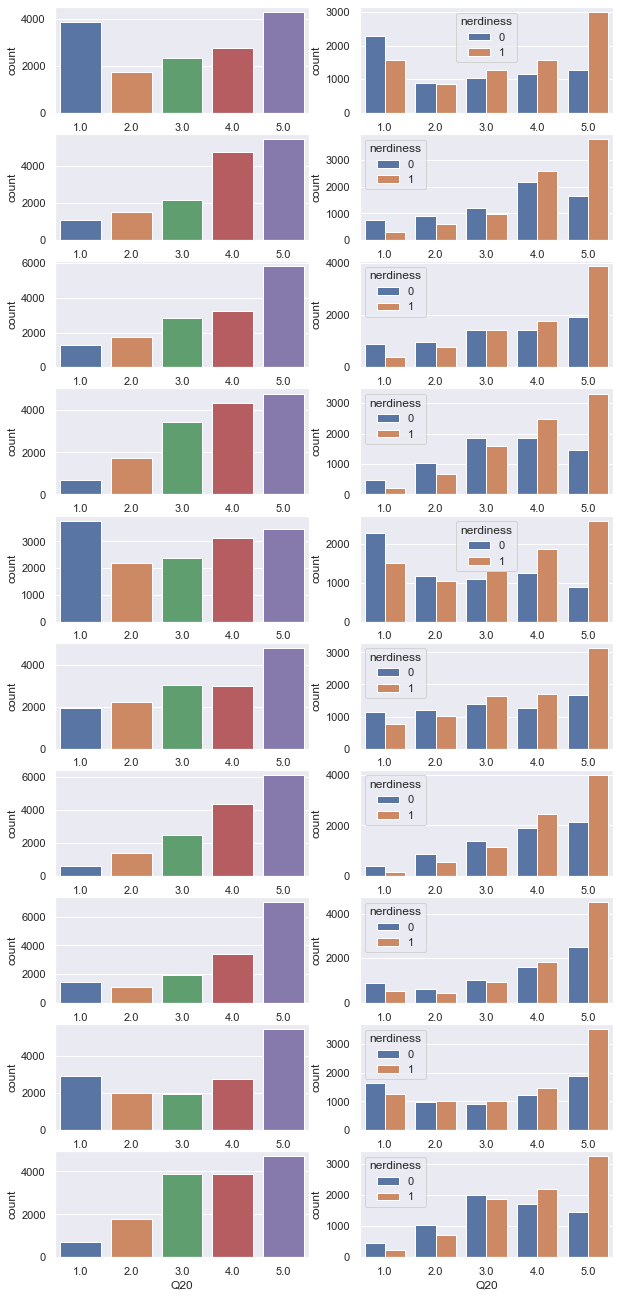

In [12]:
f, ax = plt.subplots(10, 2, figsize=(10, 23))
sns.countplot('Q11', data=train, ax=ax[0][0])
sns.countplot('Q11', hue='nerdiness', data=train, ax=ax[0][1])
sns.countplot('Q12', data=train, ax=ax[1][0])
sns.countplot('Q12', hue='nerdiness', data=train, ax=ax[1][1])
sns.countplot('Q13', data=train, ax=ax[2][0])
sns.countplot('Q13', hue='nerdiness', data=train, ax=ax[2][1])
sns.countplot('Q14', data=train, ax=ax[3][0])
sns.countplot('Q14', hue='nerdiness', data=train, ax=ax[3][1])
sns.countplot('Q15', data=train, ax=ax[4][0])
sns.countplot('Q15', hue='nerdiness', data=train, ax=ax[4][1])
sns.countplot('Q16', data=train, ax=ax[5][0])
sns.countplot('Q16', hue='nerdiness', data=train, ax=ax[5][1])
sns.countplot('Q17', data=train, ax=ax[6][0])
sns.countplot('Q17', hue='nerdiness', data=train, ax=ax[6][1])
sns.countplot('Q18', data=train, ax=ax[7][0])
sns.countplot('Q18', hue='nerdiness', data=train, ax=ax[7][1])
sns.countplot('Q19', data=train, ax=ax[8][0])
sns.countplot('Q19', hue='nerdiness', data=train, ax=ax[8][1])
sns.countplot('Q20', data=train, ax=ax[9][0])
sns.countplot('Q20', hue='nerdiness', data=train, ax=ax[9][1])
plt.show()

### About Q21 ~ Q26

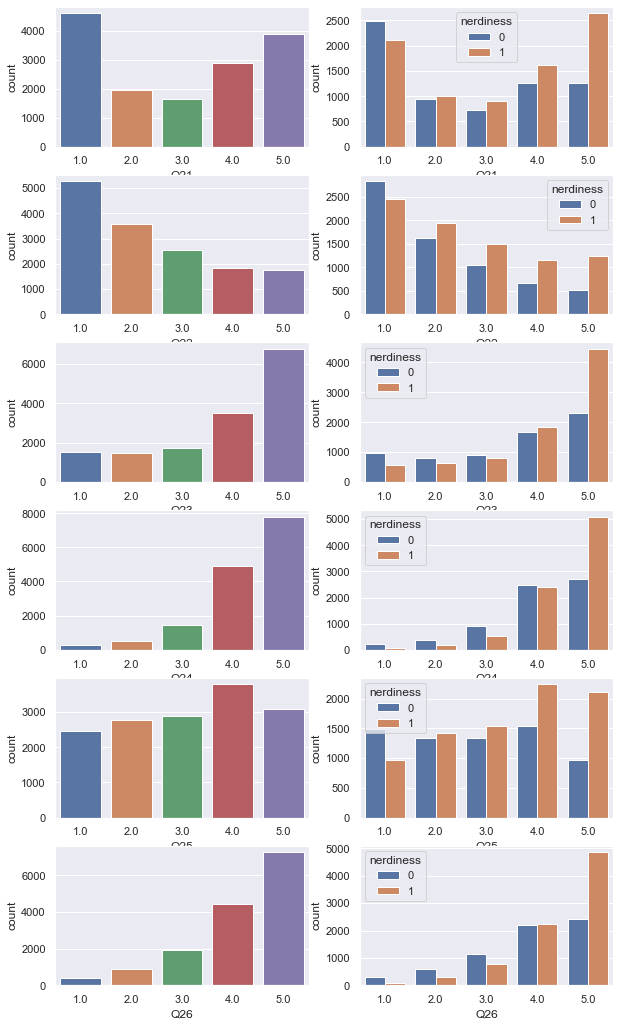

In [13]:
f, ax = plt.subplots(6, 2, figsize=(10, 18))
sns.countplot('Q21', data=train, ax=ax[0][0])
sns.countplot('Q21', hue='nerdiness', data=train, ax=ax[0][1])
sns.countplot('Q22', data=train, ax=ax[1][0])
sns.countplot('Q22', hue='nerdiness', data=train, ax=ax[1][1])
sns.countplot('Q23', data=train, ax=ax[2][0])
sns.countplot('Q23', hue='nerdiness', data=train, ax=ax[2][1])
sns.countplot('Q24', data=train, ax=ax[3][0])
sns.countplot('Q24', hue='nerdiness', data=train, ax=ax[3][1])
sns.countplot('Q25', data=train, ax=ax[4][0])
sns.countplot('Q25', hue='nerdiness', data=train, ax=ax[4][1])
sns.countplot('Q26', data=train, ax=ax[5][0])
sns.countplot('Q26', hue='nerdiness', data=train, ax=ax[5][1])
plt.show()

In [51]:
train_q = train[train.columns[0:26]]
train_q.fillna(0, inplace=True)

In [52]:
train_q.replace(1, 1, inplace=True)
train_q.replace(2, 1, inplace=True)

In [53]:
train_q.replace(3, 2, inplace=True)

In [54]:
train_q.replace(4, 3, inplace=True)
train_q.replace(5, 3, inplace=True)

In [55]:
train_q['Q1'].nunique()

4

In [56]:
train_q['Qs'] = train_q.sum(axis=1)
train_q['Qs'] = train_q['Qs'] / 26

In [57]:
train_q = pd.concat([train_q, train[train.columns[68]]], axis=1)

In [59]:
train_q.head(10)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Qs,nerdiness
0,1.0,3.0,3.0,3.0,1.0,3.0,3.0,3.0,1.0,2.0,...,3.0,3.0,1.0,3.0,1.0,3.0,1.0,1.0,2.346154,1
1,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,...,1.0,2.0,1.0,1.0,3.0,2.0,1.0,3.0,2.269231,1
2,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,...,3.0,1.0,1.0,1.0,1.0,3.0,1.0,3.0,2.346154,1
3,3.0,3.0,3.0,1.0,3.0,2.0,2.0,3.0,2.0,3.0,...,3.0,2.0,2.0,3.0,2.0,3.0,3.0,1.0,2.384615,1
4,3.0,3.0,3.0,3.0,2.0,2.0,3.0,1.0,2.0,3.0,...,3.0,1.0,3.0,1.0,2.0,3.0,3.0,3.0,2.423077,0
5,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,...,3.0,1.0,1.0,1.0,2.0,3.0,2.0,3.0,2.307692,1
6,3.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,...,2.0,3.0,3.0,2.0,3.0,3.0,2.0,3.0,2.653846,1
7,3.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,2.0,3.0,...,1.0,2.0,3.0,2.0,3.0,3.0,1.0,3.0,2.346154,1
8,3.0,3.0,2.0,3.0,3.0,3.0,3.0,2.0,2.0,3.0,...,1.0,2.0,1.0,1.0,3.0,2.0,1.0,3.0,2.230769,0
9,2.0,2.0,3.0,2.0,3.0,1.0,3.0,1.0,3.0,3.0,...,3.0,2.0,1.0,1.0,1.0,3.0,3.0,1.0,2.230769,0


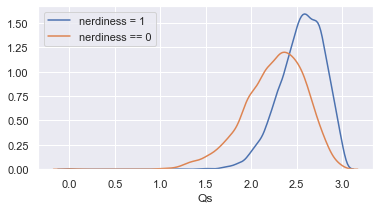

In [58]:
f, ax = plt.subplots(1, 1, figsize=(6,3))
sns.kdeplot(train_q[train_q['nerdiness'] == 1]['Qs'], ax=ax)
sns.kdeplot(train_q[train_q['nerdiness'] == 0]['Qs'], ax=ax)
plt.legend(['nerdiness = 1', 'nerdiness == 0'])
plt.ylabel('')
plt.show()

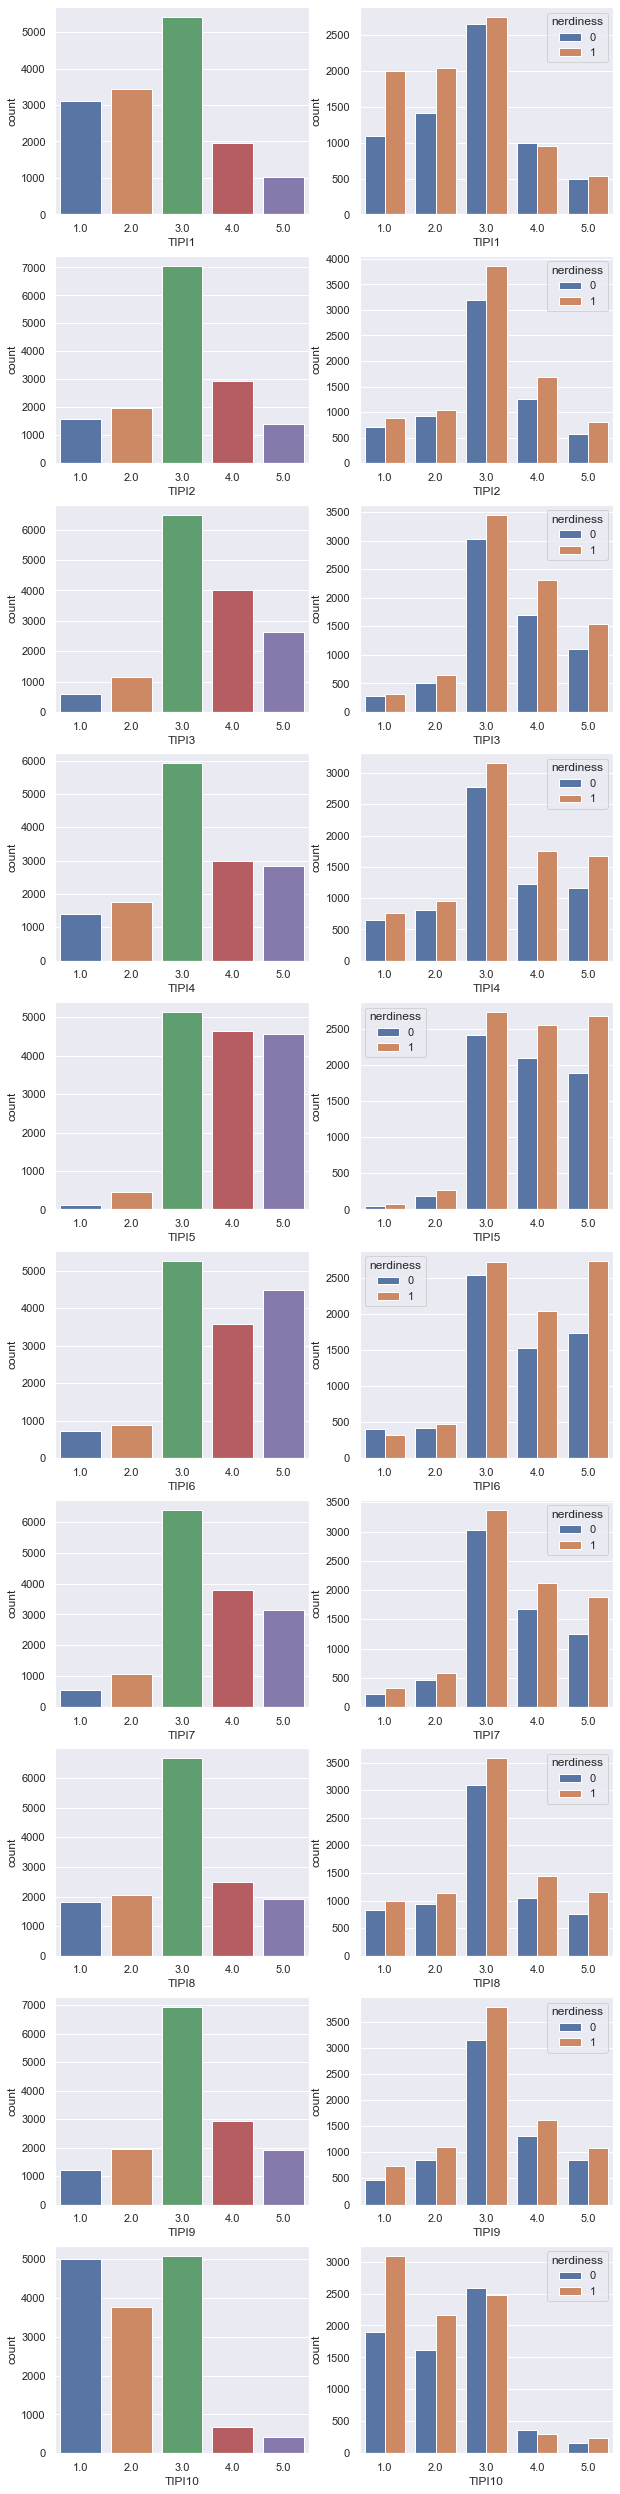

In [71]:
f, ax = plt.subplots(10, 2, figsize=(10, 45))
sns.countplot('TIPI1', data=train, ax=ax[0][0])
sns.countplot('TIPI1', hue='nerdiness', data=train, ax=ax[0][1])
sns.countplot('TIPI2', data=train, ax=ax[1][0])
sns.countplot('TIPI2', hue='nerdiness', data=train, ax=ax[1][1])
sns.countplot('TIPI3', data=train, ax=ax[2][0])
sns.countplot('TIPI3', hue='nerdiness', data=train, ax=ax[2][1])
sns.countplot('TIPI4', data=train, ax=ax[3][0])
sns.countplot('TIPI4', hue='nerdiness', data=train, ax=ax[3][1])
sns.countplot('TIPI5', data=train, ax=ax[4][0])
sns.countplot('TIPI5', hue='nerdiness', data=train, ax=ax[4][1])
sns.countplot('TIPI6', data=train, ax=ax[5][0])
sns.countplot('TIPI6', hue='nerdiness', data=train, ax=ax[5][1])
sns.countplot('TIPI7', data=train, ax=ax[6][0])
sns.countplot('TIPI7', hue='nerdiness', data=train, ax=ax[6][1])
sns.countplot('TIPI8', data=train, ax=ax[7][0])
sns.countplot('TIPI8', hue='nerdiness', data=train, ax=ax[7][1])
sns.countplot('TIPI9', data=train, ax=ax[8][0])
sns.countplot('TIPI9', hue='nerdiness', data=train, ax=ax[8][1])
sns.countplot('TIPI10', data=train, ax=ax[9][0])
sns.countplot('TIPI10', hue='nerdiness', data=train, ax=ax[9][1])
plt.show()

In [67]:
train.columns[30:40]

Index(['TIPI1', 'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8',
       'TIPI9', 'TIPI10'],
      dtype='object')

In [ ]:
train_tipis = 